# **Proyek Akhir Data Mining A**
**1. Michael Adi Pratama - C14210016**

**2. Nathalia Devita - C14210009**

**3. Mario Christopher - C14210154**

**4. Leon - C14210200**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount = True)

# **Market Basket Analysis Association Rules with Retail Data**

## **1. Import Library**

In [ ]:
# Import library:

import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import plotly.express as px


## **2. Data Cleaning- Nathalia**

In [ ]:
# read dataset dengan library pandas
data = pd.read_excel("/content/gdrive/My Drive/Colab Notebooks/DataRetail.xlsx")
retail = data.copy()

In [ ]:
retail

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
522059,581587,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
522060,581587,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
# menampilkan top 20 data
retail.head(20)

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [ ]:
def check_data(dataframe, head=5):
    print("===================== Shape ===================== ")
    print(dataframe.shape)

    print("=====================  Data Types ===================== ")
    print(dataframe.dtypes)

    print("=====================  Head ===================== ")
    print(dataframe.head(head))

    print("=====================  Tail ===================== ")
    print(dataframe.tail(head))

    print("=====================  NA ===================== ")
    print(dataframe.isnull().sum())

In [ ]:
check_data(retail)

===================== Shape ===================== 
(522064, 7)
=====================  Data Types ===================== 
BillNo                object
Itemname              object
Quantity               int64
Date          datetime64[ns]
Price                float64
CustomerID           float64
Country               object
dtype: object
=====================  Head ===================== 
   BillNo                             Itemname  Quantity                Date  \
0  536365   WHITE HANGING HEART T-LIGHT HOLDER         6 2010-12-01 08:26:00   
1  536365                  WHITE METAL LANTERN         6 2010-12-01 08:26:00   
2  536365       CREAM CUPID HEARTS COAT HANGER         8 2010-12-01 08:26:00   
3  536365  KNITTED UNION FLAG HOT WATER BOTTLE         6 2010-12-01 08:26:00   
4  536365       RED WOOLLY HOTTIE WHITE HEART.         6 2010-12-01 08:26:00   

   Price  CustomerID         Country  
0   2.55     17850.0  United Kingdom  
1   3.39     17850.0  United Kingdom  
2   2.75     1

In [ ]:
# Menghapus data data yg bernilai NA atau NULL
retail.dropna(inplace=True)
# menyeleksi dataset pada colom Quantity dimana nilai atau value Quantity hrs lebih besar > dr 0
retail = retail[retail["Quantity"] > 0]
retail = retail[retail["Price"] > 0]

In [ ]:
# data data yang telah di cleaning, dr process preprocessing
check_data(retail)

===================== Shape ===================== 
(387985, 11)
=====================  Data Types ===================== 
BillNo                       object
Itemname                     object
Quantity                      int64
Date                 datetime64[ns]
Price                       float64
CustomerID                  float64
Country                      object
Total_Price                 float64
invoice_date         datetime64[ns]
invoice_time_hour             int64
invoice_time_min              int64
dtype: object
=====================  Head ===================== 
   BillNo                             Itemname  Quantity                Date  \
0  536365   WHITE HANGING HEART T-LIGHT HOLDER         6 2010-12-01 08:26:00   
1  536365                  WHITE METAL LANTERN         6 2010-12-01 08:26:00   
2  536365       CREAM CUPID HEARTS COAT HANGER         8 2010-12-01 08:26:00   
3  536365  KNITTED UNION FLAG HOT WATER BOTTLE         6 2010-12-01 08:26:00   
4  536365       RE

## **3. Exploratory Data Analysis (EDA) and Some Visualizations - Michael Adi**

### **3.1 Explore Data**

In [ ]:
retail

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
522059,581587,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
522060,581587,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
# Total penjualan dari semua transaksi:
total_sales = retail
# mengubah value pada kolom total price dgn mengalikan price dengan jumlah quantity sebagai value baru pada kolom total price
total_sales["Total_Price"] = total_sales["Price"] * total_sales["Quantity"]
#total_sales pada tiap customer/konsumen :
total_sales_per_customer = total_sales.groupby(["CustomerID","Country"]).agg({"Total_Price": "sum"})
total_sales_per_customer


,,Total_Price
CustomerID,Country,
12346.0,United Kingdom,77183.60
12347.0,Iceland,4310.00
12349.0,Italy,1757.55
12350.0,Norway,334.40
12352.0,Norway,2506.04
...,...,...
18280.0,United Kingdom,180.60
18281.0,United Kingdom,80.82
18282.0,United Kingdom,178.05


In [ ]:
# Top 30 Product / Item yang paling sering dipesan / order di sort dari value quantity tertinggi ke terendah:
total_sales.groupby(["Itemname"]).agg({"Quantity": "sum"}).sort_values(by = 'Quantity', ascending= False).head(30)

,Quantity
Itemname,
"PAPER CRAFT , LITTLE BIRDIE",80995
MEDIUM CERAMIC TOP STORAGE JAR,77436
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53167
JUMBO BAG RED RETROSPOT,45715
WHITE HANGING HEART T-LIGHT HOLDER,35425
ASSORTED COLOUR BIRD ORNAMENT,35066
PACK OF 72 RETROSPOT CAKE CASES,31845
POPCORN HOLDER,29795
RABBIT NIGHT LIGHT,26944


### **3.2 Data Analysis**

In [ ]:
# Top 30 Items/Product yang nilai Total Price/Transaction nya tertinggi/terbesar:
total_sales.groupby(["Itemname"]).agg({"Total_Price":"sum"}).sort_values(by="Total_Price", ascending=False).head(30)

,Total_Price
Itemname,
"PAPER CRAFT , LITTLE BIRDIE",168469.60
REGENCY CAKESTAND 3 TIER,134253.10
WHITE HANGING HEART T-LIGHT HOLDER,96931.55
JUMBO BAG RED RETROSPOT,84316.26
MEDIUM CERAMIC TOP STORAGE JAR,80846.97
POSTAGE,72663.02
PARTY BUNTING,66771.83
ASSORTED COLOUR BIRD ORNAMENT,56080.10
RABBIT NIGHT LIGHT,50858.28


In [ ]:
# Top 30 Countries Customer by Quantity Product
retail.groupby(["Country"]).agg({"Quantity": "sum"}).sort_values(by= 'Quantity',ascending=False).head(30)

,Quantity
Country,
United Kingdom,4256740
Netherlands,200361
Germany,119261
France,111471
Australia,83901
Sweden,36083
Switzerland,30082
Spain,27940
Japan,26016


In [ ]:
# Top 30 Countries Customer by Total Price/Transaction:
total_sales.groupby(["Country"]).agg({"Total_Price":"sum"}).reset_index().sort_values(by="Total_Price", ascending=False).head(30)

,Country,Total_Price
27,United Kingdom,7308391.554
15,Netherlands,285446.340
6,Germany,228867.140
5,France,209024.050
0,Australia,138521.310
22,Spain,61577.110
24,Switzerland,56443.950
3,Belgium,41196.340
23,Sweden,38378.330
11,Japan,37416.370


In [ ]:
# Top 30 Shoppers by ascending Total Price and Customer Countries
total_sales_per_customer.reset_index(inplace=True)
total_sales_per_customer.sort_values(by = "Total_Price", ascending = False).head(30)

,CustomerID,Country,Total_Price
1663,14646.0,Netherlands,280206.02
4162,18102.0,United Kingdom,259657.30
3690,17450.0,United Kingdom,194550.79
2972,16446.0,United Kingdom,168472.50
44,12415.0,Australia,124914.53
3733,17511.0,United Kingdom,91062.38
2666,16029.0,United Kingdom,81024.84
0,12346.0,United Kingdom,77183.60
3140,16684.0,United Kingdom,66653.56
1266,14096.0,United Kingdom,65164.79


In [ ]:
import datetime as datetime
from datetime import datetime
datetime.strptime('2013-01-01 09:10:12', '%Y-%m-%d %H:%M:%S')

datetime.datetime(2013, 1, 1, 9, 10, 12)

In [ ]:
retail['invoice_date'] = retail['Date'].dt.date
retail['invoice_time_hour'] = retail['Date'].dt.hour
retail['invoice_time_min'] = retail['Date'].dt.minute

### Converting invoice date to data time
retail['invoice_date']= pd.to_datetime(retail['invoice_date'], infer_datetime_format= True)

In [ ]:
retail.groupby(["Date"]).agg({"Total_Price":"sum"}).reset_index().sort_values(by="Total_Price", ascending=False).head(10)

,Date,Total_Price
16926,2011-12-09 09:15:00,168469.60
1759,2011-01-18 10:01:00,77183.60
7349,2011-06-10 15:28:00,39597.40
11480,2011-09-20 11:05:00,31698.16
7523,2011-06-15 13:37:00,23426.81
13309,2011-10-21 12:08:00,22206.00
11473,2011-09-20 10:12:00,22104.80
10045,2011-08-18 08:51:00,21880.44
5095,2011-04-18 13:20:00,21535.90
13232,2011-10-20 12:03:00,20277.92


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data
data = retail.groupby(["invoice_time_hour"]).agg({"Total_Price":"sum"}).reset_index().sort_values(by="Total_Price", ascending=False).head(20)
data

,invoice_time_hour,Total_Price
6,12,1337245.840
4,10,1201675.101
7,13,1150122.340
5,11,1076121.550
9,15,937426.950
8,14,929729.701
3,9,799951.251
10,16,465193.000
2,8,257680.070
11,17,221015.581


In [ ]:
retail.groupby(["invoice_time_hour","Date"]).agg({"Total_Price":"sum"}).reset_index().sort_values(by="Total_Price", ascending=False).head(10)

,invoice_time_hour,Date,Total_Price
1819,9,2011-12-09 09:15:00,168469.60
2037,10,2011-01-18 10:01:00,77183.60
13987,15,2011-06-10 15:28:00,39597.40
5294,11,2011-09-20 11:05:00,31698.16
9789,13,2011-06-15 13:37:00,23426.81
8140,12,2011-10-21 12:08:00,22206.00
3252,10,2011-09-20 10:12:00,22104.80
320,8,2011-08-18 08:51:00,21880.44
9456,13,2011-04-18 13:20:00,21535.90
8121,12,2011-10-20 12:03:00,20277.92


In [ ]:
total_sales_per_customer.Country.value_counts()

United Kingdom          3920
Germany                   94
France                    87
Spain                     30
Belgium                   25
Switzerland               21
Portugal                  19
Italy                     14
Austria                   11
Norway                    10
Netherlands                9
Australia                  9
Sweden                     8
Japan                      8
Poland                     6
USA                        4
Unspecified                4
Greece                     4
Israel                     3
United Arab Emirates       2
Malta                      2
Bahrain                    2
Saudi Arabia               1
Singapore                  1
Iceland                    1
Lebanon                    1
Brazil                     1
Lithuania                  1
RSA                        1
Name: Country, dtype: int64

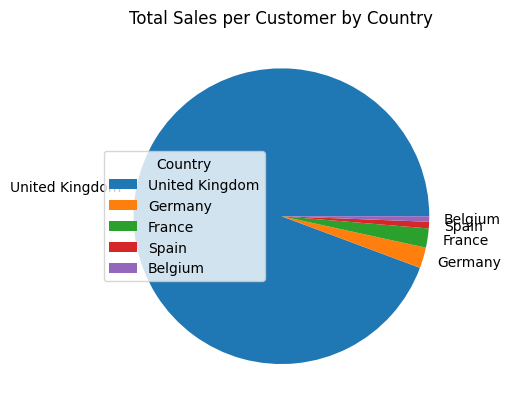

In [ ]:
import matplotlib.pyplot as plt

# Data
country_counts = total_sales_per_customer.Country.value_counts().head(5)

# Membuat pie chart
plt.pie(country_counts, labels=country_counts.index)

# Menampilkan legend dan judul
plt.legend(country_counts.index, title="Country")
plt.title("Total Sales per Customer by Country")

# Menampilkan pie chart
plt.show()


In [ ]:
total_sales_per_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4299 entries, 0 to 4298
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CustomerID   4299 non-null   float64
 1   Country      4299 non-null   object 
 2   Total_Price  4299 non-null   float64
dtypes: float64(2), object(1)
memory usage: 100.9+ KB


In [ ]:
total_sales_per_customer['Total_Price'].describe()

count      4300.000000
mean       1991.750324
std        8585.119653
min           0.000000
25%         306.720000
50%         668.495000
75%        1651.417500
max      280206.020000
Name: Total_Price, dtype: float64

In [ ]:
total_sales_per_customer['Country'].describe()

count               4300
unique                29
top       United Kingdom
freq                3921
Name: Country, dtype: object

In [ ]:
total_sales_per_customer.describe()

,CustomerID,Total_Price
count,4300.000000,4300.000000
mean,15313.673256,1991.750324
std,1717.342018,8585.119653
min,12346.000000,0.000000
25%,13826.750000,306.720000
50%,15319.500000,668.495000
75%,16789.250000,1651.417500
max,18287.000000,280206.020000


### **3.3 Data Visualization in EDA**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx

In [ ]:
# Top 50 customer by country and total price
total_sales = total_sales_per_customer.sort_values(by = "Total_Price", ascending = False).head(50)

In [ ]:
plot = px.scatter(total_sales,x="CustomerID",y="Total_Price",
	         size="Total_Price", color="Country",
                 hover_name="Country", log_x=True, size_max=80, title="Top 50 Customer and Their Contries & Shopping Amounts")
plot.show()

In [ ]:
# Top 50 customer by country and total price
data_sales = total_sales_per_customer.sort_values(by = "Total_Price", ascending = False).head(50)
sort_data = data_sales.sort_values(by='Total_Price');
sort_data

,CustomerID,Country,Total_Price
1034,13767.0,United Kingdom,17220.36
3677,17428.0,United Kingdom,17256.85
1218,14031.0,United Kingdom,17286.86
251,12678.0,France,17628.46
411,12901.0,United Kingdom,17654.54
2029,15159.0,United Kingdom,18641.01
295,12731.0,France,18895.91
89,12471.0,Germany,19824.05
1931,15039.0,United Kingdom,19914.44
3640,17381.0,United Kingdom,20275.61


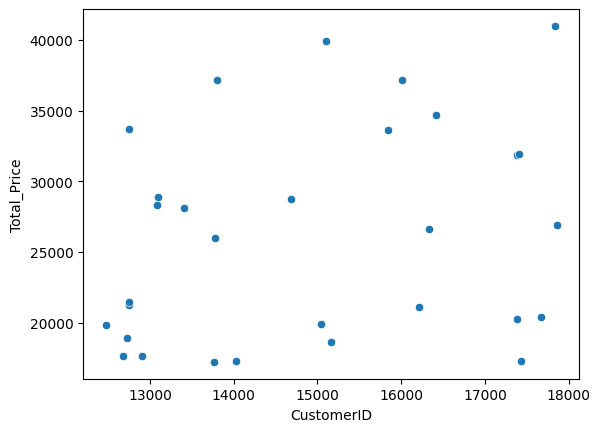

In [ ]:
sns.scatterplot(data=sort_data.head(30), x="CustomerID", y="Total_Price");

In [ ]:
# Total amount shopping by Countries Customer/Shopper
data = total_sales_per_customer.groupby(["Country"]).agg({"Total_Price":"sum"}).reset_index().sort_values(by="Total_Price", ascending=False )
plot = px.bar(data, x='Country', y='Total_Price' , title = "Shopping Amounts by Countries")
plot.show()

## **4. Clustering & Classification - Leon**

### **Invoice Product Matrix**

In [ ]:
# Kolerasi antara Product yg dipesan customer:
matrix_invoice_product = retail.groupby(['BillNo', 'Itemname']).  \
    agg({"Quantity": "sum"}).unstack().fillna(0).  \
    applymap(lambda x: 1 if x > 0 else 0)

matrix_invoice_product.head(10)

Quantity                                                 \
Itemname *Boombox Ipod Classic *USB Office Mirror Ball 10 COLOUR SPACEBOY PEN   
BillNo                                                                          
536365                       0                       0                      0   
536366                       0                       0                      0   
536367                       0                       0                      0   
536368                       0                       0                      0   
536369                       0                       0                      0   
536370                       0                       0                      0   
536371                       0                       0                      0   
536372                       0                       0                      0   
536373                       0                       0                      0   
536374                       0                       0                      0   

                                                               \
Itemname 12 COLOURED PARTY BALLOONS 12 DAISY PEGS IN WOOD BOX   
BillNo                                                          
536365                            0                         0   
536366                            0                         0   
536367                            0                         0   
536368                            0                         0   
536369                            0                         0   
536370                            0                         0   
536371                            0                         0   
536372                            0                         0   
536373                            0                         0   
536374                            0                         0   

                                                                 \
Itemname 12 EGG HOUSE PAINTED WOOD 12 HANGING EGGS HAND PAINTED   
BillNo                                                            
536365                           0                            0   
536366                           0                            0   
536367                           0                            0   
536368                           0                            0   
536369                           0                            0   
536370                           0                            0   
536371                           0                            0   
536372                           0                            0   
536373                           0                            0   
536374                           0                            0   

                                                                           \
Itemname 12 IVORY ROSE PEG PLACE SETTINGS 12 MESSAGE CARDS WITH ENVELOPES   
BillNo                                                                      
536365                                  0                               0   
536366                                  0                               0   
536367                                  0                               0   
536368                                  0                               0   
536369                                  0                               0   
536370                                  0                               0   
536371                                  0                               0   
536372                                  0                               0   
536373                                  0                               0   
536374                                  0                               0   

                                        ...                      \
Itemname 12 PENCIL SMALL TUBE WOODLAND  ... wrongly coded 20713   
BillNo                                  ...                       
536365                               0  ...    

### **Item Product count**

In [ ]:
import pandas as pd

# Mengubah dataset menjadi Invoice-Product Matrix
matrix_invoice_product = pd.crosstab(retail['BillNo'], retail['Itemname'])

# Menghitung frekuensi kemunculan setiap produk
product_frequency = matrix_invoice_product.sum()

# Menampilkan hasil frekuensi kemunculan
print(product_frequency)

Itemname
*Boombox Ipod Classic             1
*USB Office Mirror Ball           2
10 COLOUR SPACEBOY PEN          313
12 COLOURED PARTY BALLOONS      166
12 DAISY PEGS IN WOOD BOX        80
                               ... 
wrongly marked carton 22804       1
wrongly marked. 23343 in box      1
wrongly sold (22719) barcode      1
wrongly sold as sets              1
wrongly sold sets                 1
Length: 4185, dtype: int64


### **Antecendents & Support**

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Mengubah dataset menjadi Invoice-Product Matrix
invoice_product_matrix = pd.crosstab(retail['BillNo'], retail['Itemname'])

# Mengganti nilai selain 0 dengan 1
invoice_product_matrix[invoice_product_matrix > 0] = 1

# Menerapkan algoritma Apriori untuk mendapatkan itemset frekuensi tinggi
frequent_itemsets = apriori(invoice_product_matrix, min_support=0.01, use_colnames=True)

# Menerapkan aturan asosiasi
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Menampilkan hasil aturan asosiasi
print(rules)


                        antecedents  \
0          (JAM MAKING SET PRINTED)   
1          (6 RIBBONS RUSTIC CHARM)   
2          (6 RIBBONS RUSTIC CHARM)   
3        (JAM MAKING SET WITH JARS)   
4          (6 RIBBONS RUSTIC CHARM)   
...                             ...   
2999  (RED RETROSPOT CHARLOTTE BAG)   
3000    (CHARLOTTE BAG SUKI DESIGN)   
3001  (CHARLOTTE BAG PINK POLKADOT)   
3002       (WOODLAND CHARLOTTE BAG)   
3003     (STRAWBERRY CHARLOTTE BAG)   

                                            consequents  antecedent support  \
0                              (6 RIBBONS RUSTIC CHARM)            0.055226   
1                              (JAM MAKING SET PRINTED)            0.046615   
2                            (JAM MAKING SET WITH JARS)            0.046615   
3                              (6 RIBBONS RUSTIC CHARM)            0.053890   
4                             (JUMBO BAG RED RETROSPOT)            0.046615   
...                                                 ...  

### **Popular Item/Product**

In [ ]:
import pandas as pd

# Mengubah dataset menjadi Invoice-Product Matrix
matrix_invoice_product = pd.crosstab(retail['BillNo'], retail['Itemname'])

# Menghitung popularitas produk berdasarkan jumlah kemunculan dalam setiap invoice
product_popularity = matrix_invoice_product.sum().reset_index()

# Rename the columns
product_popularity.columns = ['Itemname', 'Popularity']

# Sort the products by popularity in descending order
product_popularity = product_popularity.sort_values(by='Popularity', ascending=False)

# Print the top 5 popular products
print("Top 5 popular products:")
print(product_popularity.head(5))

Top 5 popular products:
                                Itemname  Popularity
3882  WHITE HANGING HEART T-LIGHT HOLDER        2269
1842             JUMBO BAG RED RETROSPOT        2087
2884            REGENCY CAKESTAND 3 TIER        1930
2445                       PARTY BUNTING        1677
2029             LUNCH BAG RED RETROSPOT        1570


### **Unpopular Product/Item**

In [ ]:
import pandas as pd

# Mengubah dataset menjadi Invoice-Product Matrix
matrix_invoice_product = pd.crosstab(retail['BillNo'], retail['Itemname'])

# Menghitung frekuensi kemunculan setiap produk
product_popularity = matrix_invoice_product.sum().reset_index()

# Rename the columns
product_popularity.columns = ['Itemname', 'Popularity']

# Sort the products by popularity in ascending order
product_popularity = product_popularity.sort_values(by='Popularity')

# Print the top 5 unpopular products
print("Top 5 unpopular products:")
print(product_popularity.head(5))


Top 5 unpopular products:
                              Itemname  Popularity
0                *Boombox Ipod Classic           1
1862        KEEP OUT GIRLS DOOR HANGER           1
1920          LARGE HEART FLOWERS HOOK           1
1926               LARGE PARLOUR FRAME           1
1933  LARGE ROUND CUTGLASS CANDLESTICK           1


In [ ]:
import pandas as pd

# Ubah kolom 'Tanggal' menjadi tipe tanggal dan waktu
retail['Date'] = pd.to_datetime(retail['Date'])

#Ekstrak tahun dan bulan dari kolom 'Tanggal'
retail['YearMonth'] = retail['Date'].dt.to_period('M')

# Kelompokkan data berdasarkan 'YearMonth' dan 'Itemname' dan hitung jumlah totalnya
purchase_trend = retail.groupby(['YearMonth', 'Itemname'])['Quantity'].sum().reset_index()

# Urutkan data berdasarkan 'YearMonth' dalam ascending order
purchase_trend = purchase_trend.sort_values(by='YearMonth')

#print tren pembelian untuk setiap produk
for item in purchase_trend['Itemname'].unique():
    item_data = purchase_trend[purchase_trend['Itemname'] == item]
    print("Purchase trend for", item)
    print(item_data)
    print()


Streaming output truncated to the last 5000 lines.
Purchase trend for JUMBO BAG PEARS
      YearMonth         Itemname  Quantity
13637   2011-05  JUMBO BAG PEARS      1322
16160   2011-06  JUMBO BAG PEARS      1024
18786   2011-07  JUMBO BAG PEARS       842
21409   2011-08  JUMBO BAG PEARS      1307
24033   2011-09  JUMBO BAG PEARS      1076
26801   2011-10  JUMBO BAG PEARS       571
29727   2011-11  JUMBO BAG PEARS       688
32433   2011-12  JUMBO BAG PEARS       101

Purchase trend for JUMBO BAG VINTAGE LEAF
      YearMonth                Itemname  Quantity
13646   2011-05  JUMBO BAG VINTAGE LEAF      1862
16169   2011-06  JUMBO BAG VINTAGE LEAF      1300
18795   2011-07  JUMBO BAG VINTAGE LEAF      1315
21420   2011-08  JUMBO BAG VINTAGE LEAF      1778
24043   2011-09  JUMBO BAG VINTAGE LEAF      1381
26811   2011-10  JUMBO BAG VINTAGE LEAF       990
29737   2011-11  JUMBO BAG VINTAGE LEAF      1573
32443   2011-12  JUMBO BAG VINTAGE LEAF       480

Purchase trend for JUMBO BAG DOIL

## **5. Associative Rules - Mario Christopher**

In [ ]:
# mencari itemset product yang paling sering muncul/ frequently itemset:
frequently_itemsets = apriori(matrix_invoice_product, min_support= 0.01, use_colnames=True, max_len = 2)
frequently_itemsets_lvl1 = apriori(matrix_invoice_product, min_support=0.01, use_colnames=True, max_len=2)  # frequently itemset antara kategori produk dan subkategori produk
frequently_itemsets_lvl2 = apriori(matrix_invoice_product, min_support=0.01, use_colnames=True, max_len=3)  # frequently itemset antara kategori produk, subkategori produk, dan produk individu

In [ ]:
multilevel_associations = pd.concat([frequently_itemsets_lvl1, frequently_itemsets_lvl2], axis=0)


In [ ]:
# Cetak frequently itemset pada tingkat kategori produk dan subkategori produk
print("Frequently Itemset (Level 1 - Kategori Produk & Subkategori Produk):")
print(frequently_itemsets_lvl1.head(30))

# Cetak frequently itemset pada tingkat kategori produk, subkategori produk, dan produk individu
print("Frequently Itemset (Level 2 - Kategori Produk, Subkategori Produk, & Produk Individu):")
print(frequently_itemsets_lvl2.head(30))

# Gabungkan frequently itemset dari setiap tingkat menjadi struktur multilevel
multilevel_associations = pd.concat([frequently_itemsets_lvl1, frequently_itemsets_lvl2], axis=0)

# Cetak struktur multilevel
print("Multilevel Associations:")
print(multilevel_associations)


Frequently Itemset (Level 1 - Kategori Produk & Subkategori Produk):
     support                                           itemsets
0   0.015439               ((Quantity, 10 COLOUR SPACEBOY PEN))
1   0.012272      ((Quantity, 12 MESSAGE CARDS WITH ENVELOPES))
2   0.017468        ((Quantity, 12 PENCIL SMALL TUBE WOODLAND))
3   0.017815  ((Quantity, 12 PENCILS SMALL TUBE RED RETROSPOT))
4   0.017468          ((Quantity, 12 PENCILS SMALL TUBE SKULL))
5   0.013064   ((Quantity, 12 PENCILS TALL TUBE RED RETROSPOT))
6   0.012569          ((Quantity, 12 PENCILS TALL TUBE SKULLS))
7   0.012025        ((Quantity, 12 PENCILS TALL TUBE WOODLAND))
8   0.012223  ((Quantity, 15CM CHRISTMAS GLASS BALL 20 LIGHTS))
9   0.010293              ((Quantity, 20 DOLLY PEGS RETROSPOT))
10  0.014895   ((Quantity, 3 HEARTS HANGING DECORATION RUSTIC))
11  0.018508     ((Quantity, 3 HOOK PHOTO SHELF ANTIQUE WHITE))
12  0.018409   ((Quantity, 3 PIECE SPACEBOY COOKIE CUTTER SET))
13  0.022615             ((Quantity

### **Support**

In [ ]:
frequently_itemsets.sort_values("support", ascending=False)

,support,itemsets
752,0.108967,"((Quantity, WHITE HANGING HEART T-LIGHT HOLDER))"
331,0.102138,"((Quantity, JUMBO BAG RED RETROSPOT))"
537,0.094220,"((Quantity, REGENCY CAKESTAND 3 TIER))"
446,0.081948,"((Quantity, PARTY BUNTING))"
371,0.076257,"((Quantity, LUNCH BAG RED RETROSPOT))"
...,...,...
191,0.010046,"((Quantity, ENAMEL WASH BOWL CREAM))"
431,0.010046,"((Quantity, PANTRY PASTRY BRUSH))"
624,0.010046,"((Quantity, SET OF 5 MINI GROCERY MAGNETS))"
1532,0.010046,"((Quantity, SET OF 6 SPICE TINS PANTRY DESIGN)..."


In [ ]:
# menghitung nilai support, confidence dan lift dari tiap itemset product, di sort berdasarkan support secara descending:
rules = association_rules(frequently_itemsets, metric="support", min_threshold=0.003)
rules.sort_values("support", ascending=False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
703,"((Quantity, JUMBO BAG RED RETROSPOT))","((Quantity, JUMBO BAG PINK POLKADOT))",0.102138,0.059927,0.040529,0.396802,6.621454,0.034408,1.558483
702,"((Quantity, JUMBO BAG PINK POLKADOT))","((Quantity, JUMBO BAG RED RETROSPOT))",0.059927,0.102138,0.040529,0.676301,6.621454,0.034408,2.773753
413,"((Quantity, GREEN REGENCY TEACUP AND SAUCER))","((Quantity, ROSES REGENCY TEACUP AND SAUCER))",0.048248,0.050129,0.036174,0.749744,14.956385,0.033755,3.795592
412,"((Quantity, ROSES REGENCY TEACUP AND SAUCER))","((Quantity, GREEN REGENCY TEACUP AND SAUCER))",0.050129,0.048248,0.036174,0.721619,14.956385,0.033755,3.418881
782,"((Quantity, JUMBO STORAGE BAG SUKI))","((Quantity, JUMBO BAG RED RETROSPOT))",0.058294,0.102138,0.035679,0.612054,5.992439,0.029725,2.314402
783,"((Quantity, JUMBO BAG RED RETROSPOT))","((Quantity, JUMBO STORAGE BAG SUKI))",0.102138,0.058294,0.035679,0.349322,5.992439,0.029725,1.447269
778,"((Quantity, JUMBO BAG RED RETROSPOT))","((Quantity, JUMBO SHOPPER VINTAGE RED PAISLEY))",0.102138,0.057700,0.033452,0.327519,5.676254,0.027559,1.401230
779,"((Quantity, JUMBO SHOPPER VINTAGE RED PAISLEY))","((Quantity, JUMBO BAG RED RETROSPOT))",0.057700,0.102138,0.033452,0.579760,5.676254,0.027559,2.136546
58,"((Quantity, ALARM CLOCK BAKELIKE RED))","((Quantity, ALARM CLOCK BAKELIKE GREEN))",0.050821,0.047852,0.031324,0.616358,12.880423,0.028892,2.481867
59,"((Quantity, ALARM CLOCK BAKELIKE GREEN))","((Quantity, ALARM CLOCK BAKELIKE RED))",0.047852,0.050821,0.031324,0.654602,12.880423,0.028892,2.748071


### **Lift**

In [ ]:
# menghitung nilai itemset product berdasarkan nilai lift nya:
sorted_rules = rules.sort_values("lift", ascending=False)
rules.sort_values("lift", ascending=False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
483,"((Quantity, HERB MARKER THYME))","((Quantity, HERB MARKER ROSEMARY))",0.011530,0.011580,0.010738,0.931330,80.428744,0.010605,14.393872
482,"((Quantity, HERB MARKER ROSEMARY))","((Quantity, HERB MARKER THYME))",0.011580,0.011530,0.010738,0.927350,80.428744,0.010605,13.605998
481,"((Quantity, HERB MARKER THYME))","((Quantity, HERB MARKER PARSLEY))",0.011530,0.011481,0.010392,0.901288,78.505254,0.010260,10.014131
480,"((Quantity, HERB MARKER PARSLEY))","((Quantity, HERB MARKER THYME))",0.011481,0.011530,0.010392,0.905172,78.505254,0.010260,10.423865
479,"((Quantity, HERB MARKER PARSLEY))","((Quantity, HERB MARKER ROSEMARY))",0.011481,0.011580,0.010392,0.905172,78.169761,0.010259,10.423343
478,"((Quantity, HERB MARKER ROSEMARY))","((Quantity, HERB MARKER PARSLEY))",0.011580,0.011481,0.010392,0.897436,78.169761,0.010259,9.638064
473,"((Quantity, HERB MARKER MINT))","((Quantity, HERB MARKER PARSLEY))",0.011679,0.011481,0.010293,0.881356,76.769141,0.010159,8.331806
472,"((Quantity, HERB MARKER PARSLEY))","((Quantity, HERB MARKER MINT))",0.011481,0.011679,0.010293,0.896552,76.769141,0.010159,9.553774
468,"((Quantity, HERB MARKER ROSEMARY))","((Quantity, HERB MARKER BASIL))",0.011580,0.011679,0.010342,0.893162,76.478922,0.010207,9.250689
469,"((Quantity, HERB MARKER BASIL))","((Quantity, HERB MARKER ROSEMARY))",0.011679,0.011580,0.010342,0.885593,76.478922,0.010207,8.639527


### **Confidence**

In [ ]:
# diurutkan berdasarkan nilai confidence:
sorted_rules = rules.sort_values("confidence", ascending=False)
rules.sort_values("confidence", ascending=False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
483,"((Quantity, HERB MARKER THYME))","((Quantity, HERB MARKER ROSEMARY))",0.011530,0.011580,0.010738,0.931330,80.428744,0.010605,14.393872
482,"((Quantity, HERB MARKER ROSEMARY))","((Quantity, HERB MARKER THYME))",0.011580,0.011530,0.010738,0.927350,80.428744,0.010605,13.605998
1439,"((Quantity, REGENCY TEA PLATE PINK))","((Quantity, REGENCY TEA PLATE GREEN))",0.013955,0.017567,0.012718,0.911348,51.877495,0.012473,11.081841
479,"((Quantity, HERB MARKER PARSLEY))","((Quantity, HERB MARKER ROSEMARY))",0.011481,0.011580,0.010392,0.905172,78.169761,0.010259,10.423343
480,"((Quantity, HERB MARKER PARSLEY))","((Quantity, HERB MARKER THYME))",0.011481,0.011530,0.010392,0.905172,78.505254,0.010260,10.423865
481,"((Quantity, HERB MARKER THYME))","((Quantity, HERB MARKER PARSLEY))",0.011530,0.011481,0.010392,0.901288,78.505254,0.010260,10.014131
478,"((Quantity, HERB MARKER ROSEMARY))","((Quantity, HERB MARKER PARSLEY))",0.011580,0.011481,0.010392,0.897436,78.169761,0.010259,9.638064
472,"((Quantity, HERB MARKER PARSLEY))","((Quantity, HERB MARKER MINT))",0.011481,0.011679,0.010293,0.896552,76.769141,0.010159,9.553774
468,"((Quantity, HERB MARKER ROSEMARY))","((Quantity, HERB MARKER BASIL))",0.011580,0.011679,0.010342,0.893162,76.478922,0.010207,9.250689
467,"((Quantity, HERB MARKER PARSLEY))","((Quantity, HERB MARKER BASIL))",0.011481,0.011679,0.010243,0.892241,76.400058,0.010109,9.171623


In [ ]:
# Mencoba memanggil fungsi sort rules untuk mendapatkan rekomendasi product yang memiliki nilai confidence cukup tinggi:
# ('Quantity', 'ROSES REGENCY TEACUP AND SAUCER')
# ('Quantity', 'LUNCH BAG RED RETROSPOT')
# ('Quantity', 'LUNCH BAG VINTAGE DOILY')
# ('Quantity', 'HOT WATER BOTTLE TEA AND SYMPATHY')
# ('Quantity', 'JUMBO SHOPPER VINTAGE RED PAISLEY')
# ('Quantity', 'PACK OF 60 PINK PAISLEY CAKE CASES')

recommendation_product = []

for i, product in sorted_rules["antecedents"].items():
    for j in list(product):
        if j == ('Quantity', 'PACK OF 60 PINK PAISLEY CAKE CASES'):
            recommendation_product.append(list(sorted_rules.iloc[i]["consequents"]))

### **Recommendation Product**

In [ ]:
print("Recommendation Product: ")
recommendation_product

Recommendation Product: 


[[('Quantity', 'JAM MAKING SET WITH JARS')],
 [('Quantity', 'SMALL DOLLY MIX DESIGN ORANGE BOWL')],
 [('Quantity', 'WOODEN STAR CHRISTMAS SCANDINAVIAN')],
 [('Quantity', 'JUMBO BAG DOLLY GIRL DESIGN')],
 [('Quantity', 'WOODLAND CHARLOTTE BAG')],
 [('Quantity', '60 TEATIME FAIRY CAKE CASES')],
 [('Quantity', 'WOODLAND CHARLOTTE BAG')]]

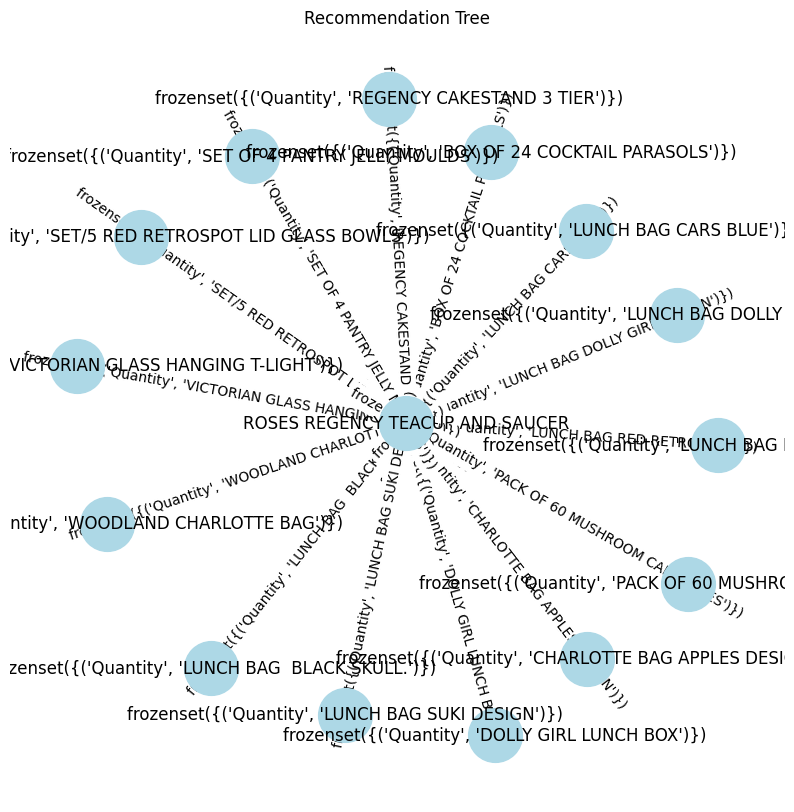

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt


G = nx.DiGraph()


for i, product in sorted_rules["antecedents"].items():
    for j in list(product):
        if j == ('Quantity', 'ROSES REGENCY TEACUP AND SAUCER'):
            consequents = sorted_rules.iloc[i]["consequents"]
            G.add_edge('ROSES REGENCY TEACUP AND SAUCER', consequents)

pos = nx.spring_layout(G)


plt.figure(figsize=(10, 10))
nx.draw_networkx(G, pos, with_labels=True, node_size=1500, node_color='lightblue', edge_color='gray')


node_labels = nx.get_node_attributes(G, 'name')
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=12)


edge_labels = {(u, v): v for u, v in G.edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)


plt.title('Recommendation Tree')
plt.axis('off')
plt.show()


## **6. Data Visualizations - Michael Adi**

In [ ]:
# import library untuk visualisasi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx

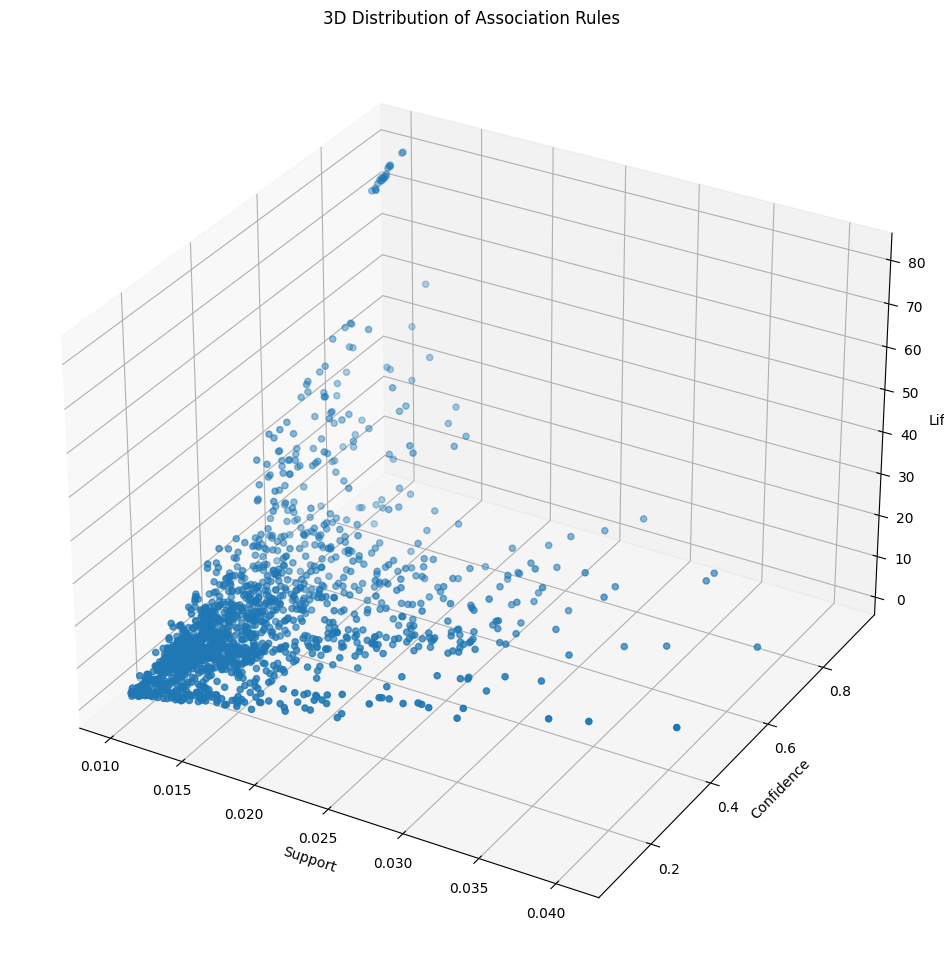

In [ ]:
# plot tanpa color
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
# sns.set(style = "whitegrid")
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection = '3d')


x = rules['support']
y = rules['confidence']
z = rules['lift']

ax.set_xlabel("Support")
ax.set_ylabel("Confidence")
ax.set_zlabel("Lift")

ax.scatter(x, y, z)
ax.set_title("3D Distribution of Association Rules")

plt.show()

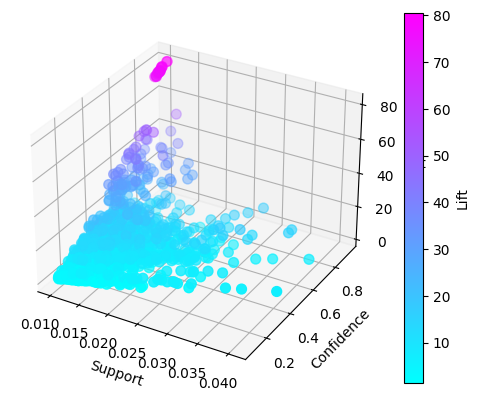

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


support = rules['support'].values
confidence = rules['confidence'].values
lift = rules['lift'].values


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


scatter = ax.scatter(support, confidence, lift, c=lift, cmap='cool', s=50)

ax.set_xlabel('Support')
ax.set_ylabel('Confidence')
ax.set_zlabel('Lift')


cbar = plt.colorbar(scatter)
cbar.set_label('Lift')

plt.show()

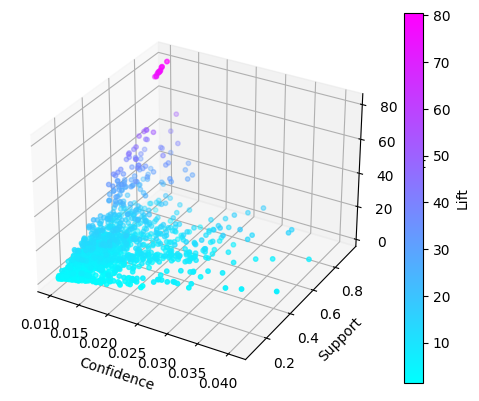

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Extract support, confidence, and lift values from the rules
support = rules['support'].values
confidence = rules['confidence'].values
lift = rules['lift'].values

# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(support, confidence, lift, c=lift, cmap='cool', s=10)

# Set labels for axes
ax.set_xlabel('Confidence')
ax.set_ylabel('Support')
ax.set_zlabel('Lift')

# Set colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Lift')

plt.show()

In [ ]:
result_rules = rules[rules['consequents'].astype(str).str.contains('LUNCH BAG RED RETROSPOT')]
result_rules = result_rules.sort_values(by=['lift'],ascending = [False]).reset_index(drop = True)

display(result_rules.head());

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"((Quantity, LUNCH BAG PINK POLKADOT))","((Quantity, LUNCH BAG RED RETROSPOT))",0.053098,0.076257,0.029345,0.552656,7.247290,0.025296,2.064951
1,"((Quantity, LUNCH BAG DOLLY GIRL DESIGN))","((Quantity, LUNCH BAG RED RETROSPOT))",0.033205,0.076257,0.017369,0.523100,6.859703,0.014837,1.936974
2,"((Quantity, LUNCH BAG WOODLAND))","((Quantity, LUNCH BAG RED RETROSPOT))",0.049683,0.076257,0.025732,0.517928,6.791885,0.021944,1.916194
3,"((Quantity, LUNCH BAG SUKI DESIGN))","((Quantity, LUNCH BAG RED RETROSPOT))",0.053345,0.076257,0.027415,0.513915,6.739252,0.023347,1.900372
4,"((Quantity, LUNCH BAG BLACK SKULL.))","((Quantity, LUNCH BAG RED RETROSPOT))",0.062352,0.076257,0.031275,0.501587,6.577596,0.026520,1.853370
